# 1.) Pull in Data and Convert ot Monthly

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%%**********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [3]:
# difference in stock price
df["Diff"] = df.diff().shift(-1)

# Target up or down
df["Target"] = np.sign(df["Diff"])

# Option premium
df["Premium"] = .08 * df["Adj Close"]


In [4]:
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31,0.117887,-0.020296,-1.0,0.009431
1981-01-31,0.097592,-0.006045,-1.0,0.007807
1981-02-28,0.091546,-0.006909,-1.0,0.007324
1981-03-31,0.084637,0.013386,1.0,0.006771
1981-04-30,0.098023,0.016409,1.0,0.007842


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [6]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [7]:
y = df.loc[:"2023-09-30","Target"].copy()

df = df.loc[:"2023-09-30"].copy()

In [8]:
logreg = LogisticRegression()

logreg.fit(X, y)

y_pred = logreg.predict(X)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 514 entries, 1980-12-31 to 2023-09-30
Freq: M
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  514 non-null    float64
 1   Diff       514 non-null    float64
 2   Target     514 non-null    float64
 3   Premium    514 non-null    float64
dtypes: float64(4)
memory usage: 20.1 KB


# 4.) Add columns, prediction and profits.

In [10]:
df["Predictions"] = y_pred

In [15]:
df["Profits"] = 0

# True Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == 1), "Profits"] = df["Premium"]

#False Positives
df.loc[(df["Predictions"] == 1) & (df["Target"] == -1), "Profits"] = 100 * df["Diff"] + df["Premium"]


# 5.) Plot profits over time

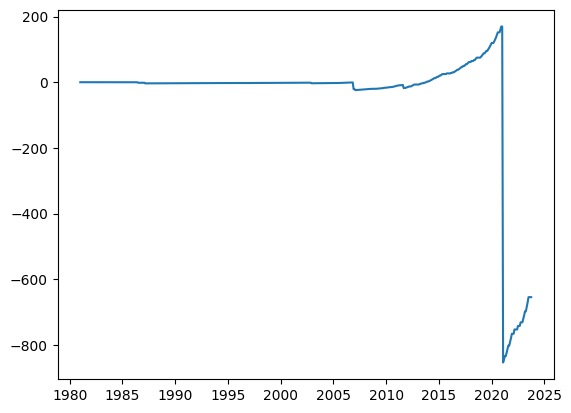

In [16]:
plt.plot(np.cumsum(df["Profits"]))

####  5.5.) Your skills from MQE to help Mr. Lius ventures

i think with skills i learn from MQE i can contribute to Mr. Lius ventures by analyzing people pattern of buying tickets and sending/giving in the website. also with analizyng time frame of peak transaction, we can give content creator a tips on how and when the content should deliver to gives max revenue tickets.

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.